In [1]:
import pandas as pd
import numpy as np

# 1 Data load

In [2]:
movies = pd.read_csv('datasets/06/movielens/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
tags = pd.read_csv('datasets/06/movielens/tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


<hr>

# 2 Data transformation

In [4]:
tags_grouped = tags.groupby(['movieId'], as_index = False).agg({'tag': ' '.join})
tags_grouped

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake
...,...,...
1567,183611,Comedy funny Rachel McAdams
1568,184471,adventure Alicia Vikander video game adaptation
1569,187593,Josh Brolin Ryan Reynolds sarcasm
1570,187595,Emilia Clarke star wars


In [5]:
merged = pd.merge(movies, tags_grouped, on='movieId', how='left')
merged

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN
9739,193585,Flint (2017),Drama,NaN
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN


In [6]:
merged.fillna('', inplace=True)
merged['metadata'] = merged['genres'] + ' ' + merged['tag']
merged = merged[['movieId', 'title', 'metadata']]
merged

,movieId,title,metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy pi...
1,2,Jumanji (1995),Adventure|Children|Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy|Romance moldy old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy pregnancy remake
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
X = merged['metadata']

<hr>

# 3 Vektorizace

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [12]:
text_processor = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [13]:
X_processed = text_processor.fit_transform(X)
X_processed

<9742x1748 sparse matrix of type '<class 'numpy.float64'>'
	with 28281 stored elements in Compressed Sparse Row format>

<hr>

# 4 Ziskani nejpodobnejsiho filmu

In [31]:
FILM_INDEX = 1322

In [34]:
FIND_NEAREST_NEIGHBOR_FOR:np.array = X_processed[FILM_INDEX].toarray() # "nahodne" zvoleny nejaky film, resp. jeho metadata
FIND_NEAREST_NEIGHBOR_FOR

array([[0., 0., 0., ..., 0., 0., 0.]])

In [40]:
print("Vybrany film:", merged.iloc[FILM_INDEX,:][1], "\nMetadata:", merged.iloc[FILM_INDEX,:][2])

Vybrany film: As Good as It Gets (1997) 
Metadata: Comedy|Drama|Romance 


## 4.1 KDTree

In [14]:
from sklearn.neighbors import KDTree
kdt = KDTree(X_processed.toarray(), leaf_size=30, metric='euclidean')

In [16]:
print("Nearest neighbor:")
kdt.query(FIND_NEAREST_NEIGHBOR_FOR, k=2, return_distance=False)

Nearest neighbor:


array([[ 3, 83]], dtype=int64)

In [17]:
print("Vzdalenost od nejblizsiho souseda:")
kdt.query(FIND_NEAREST_NEIGHBOR_FOR, k=2, return_distance=True)[0]

Vzdalenost od nejblizsiho souseda:


array([[0., 0.]])

## 4.2 Cosine similarity - vsichni

In [18]:
from sklearn.metrics.pairwise import cosine_similarity as cs

similarities = cs(X_processed, FIND_NEAREST_NEIGHBOR_FOR) # ziskani podobnosti
X_w_similarities = merged.copy() # pridame podobnosti do puvodniho datasetu
X_w_similarities['similarities'] = similarities # podobnosti pridame jako novy sloupec
X_w_similarities.sort_values('similarities', ascending=False).head(n=20)

,movieId,title,metadata,similarities
3834,5380,"Importance of Being Earnest, The (2002)",Comedy|Drama|Romance,1.0
5413,25805,"Atalante, L' (1934)",Comedy|Drama|Romance,1.0
8265,105211,Enough Said (2013),Comedy|Drama|Romance,1.0
4275,6241,Pauline at the Beach (Pauline à la Plage) (1983),Comedy|Drama|Romance,1.0
8266,105213,Don Jon (2013),Comedy|Drama|Romance,1.0
631,803,Walking and Talking (1996),Comedy|Drama|Romance,1.0
7048,69224,Marius and Jeanette (Marius et Jeannette) (1997),Comedy|Drama|Romance,1.0
4288,6266,What a Girl Wants (2003),Comedy|Drama|Romance,1.0
4293,6271,Day for Night (La Nuit Américaine) (1973),Comedy|Drama|Romance,1.0
4857,7260,Latter Days (2003),Comedy|Drama|Romance,1.0


Jak muzeme videt, vsechny vyse uvedene filmy maji stejna "metadata"/zanr jako nas vybrany film

## 4.3 Cosine similarity - jedna instance

In [19]:
print("Cosinova podobnost pro dve vybrane instance:")
cs(X_processed[3],FIND_NEAREST_NEIGHBOR_FOR)

Cosinova podobnost pro dve vybrane instance:


array([[1.]])

<hr>

# 5 Vizualizace

In [20]:
ratings = pd.read_csv('datasets/06/movielens/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [21]:
# pridame metadata k hodnoceni
X = pd.merge(ratings, merged, on='movieId', how='left').drop(['timestamp', 'rating'], axis=1)
y = ratings['rating']
X

,userId,movieId,title,metadata
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy pi...
1,1,3,Grumpier Old Men (1995),Comedy|Romance moldy old
2,1,6,Heat (1995),Action|Crime|Thriller
3,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller mystery twist ending serial k...
4,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller mindfuck suspense thril...
...,...,...,...,...
100831,610,166534,Split (2017),Drama|Horror|Thriller
100832,610,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller action dark hero gun tac...
100833,610,168250,Get Out (2017),Horror
100834,610,168252,Logan (2017),Action|Sci-Fi dark emotional gritty heartbreak...


In [22]:
X_processed_w_rating = text_processor.fit_transform(X['metadata'])

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
SAMPLE_SIZE = 10000

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, n_iter=250)
X_reduced = tsne.fit_transform(X_processed_w_rating[:SAMPLE_SIZE])

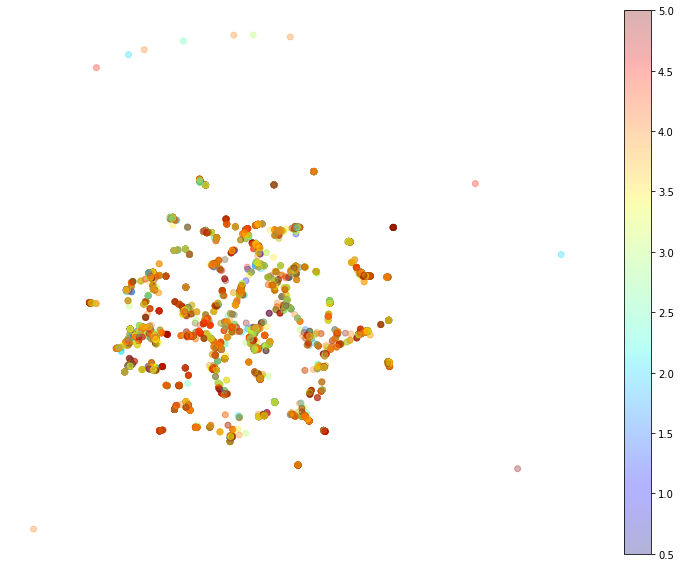

In [26]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y[:SAMPLE_SIZE], cmap="jet", alpha=0.3)
plt.axis('off')
plt.colorbar()
plt.show()